Цель лабораторной работы – получение навыков работы с методами регрессии
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных
(включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после
масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6. Заполните пропущенные значения в данных;
7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения
(метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).
Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент
корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
%matplotlib inline

figsize = (20,10)

In [3]:
data = pd.read_csv("autos.csv", encoding="ISO-8859-1")

In [4]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 1 Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

1. *dateCrawled*: **when this ad was first crawled, all field-values are taken from this date**
2. *name*: **"имя" автомобиля**
3. *seller*: **частный или дилер**
4. *offerType*: **-**
5. *price*: **цена объявления о продаже автомобиля**
6. *abtest*: **-**
7. *vehicleType*: **-**
8. *yearOfRegistration*: **в каком году автомобиль был впервые зарегистрирован**
9. *gearbox*: **коробка передач**
10. *powerPS*: **мощность машины в PS**
11. *fuelType*: **-**
12. *model*: **-**
13. *kilometer*: **сколько километров машина проехала**
14. *monthOfRegistration*: **в каком месяце автомобиль был впервые зарегистрирован**
15. *brand*: **-**
16. *notRepairedDamage*: **если у автомобиля есть повреждение, которое еще не отремонтировано**
17. *dateCreated*: **дата, на которую было создано объявление на ebay**
18. *nrOfPictures*: **количество картинок в объявлении (к сожалению, это поле везде содержит 0 и, таким образом,
бесполезно (ошибка в сканере!))**
19. *postalCode*: **-**
20. *lastSeenOnline*: **когда сканер видел это объявление в последний раз**
Поля *lastSeen* и *dateCreated* могут быть использованы для оценки того, как долго машина будет находиться в сети,
по крайней мере, до ее продажи.

### 2 Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [8]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [9]:
data.shape

(371528, 20)

In [10]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.drop(
    ['dateCrawled', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model'],
    axis = 1,
    inplace=True
)
data.shape

(260952, 13)

### 3 Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

In [11]:
numerical_columns = [i for i in data.columns if data[i].dtype.name != 'object']
print("Numerical: " + str(numerical_columns))

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']


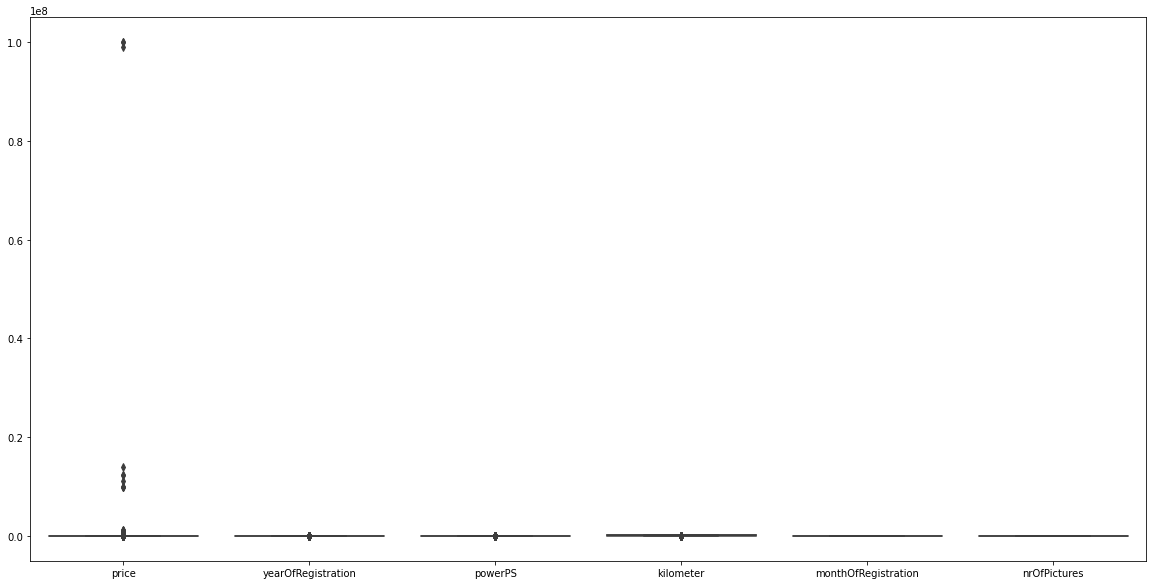

In [12]:
plt.figure(figsize=figsize)
sns.boxplot(data=data[numerical_columns])
plt.show()

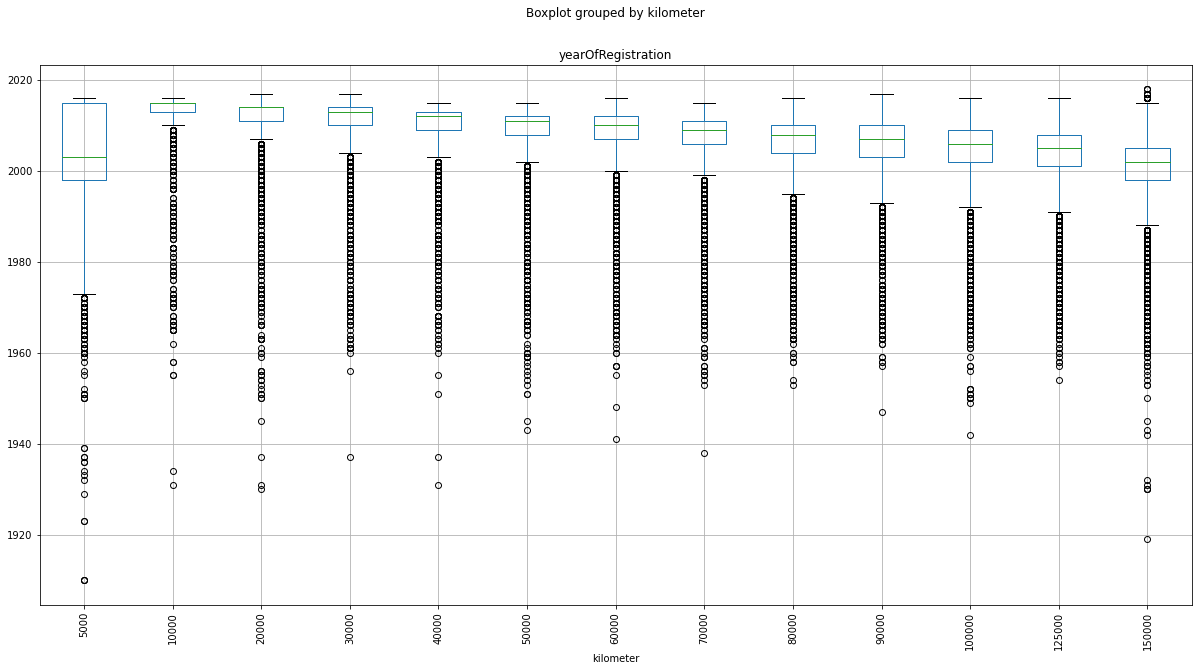

In [13]:
data.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

In [14]:
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures
count,260952.000000,260952.000000,260952.000000,260952.000000,260952.000000,260952.0
mean,0.000082,0.863977,0.006317,0.821096,0.515214,0.0
std,0.003433,0.060298,0.007264,0.274813,0.289281,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000015,0.824074,0.003900,0.655172,0.250000,0.0
50%,0.000039,0.870370,0.005800,1.000000,0.500000,0.0
75%,0.000086,0.907407,0.007500,1.000000,0.750000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


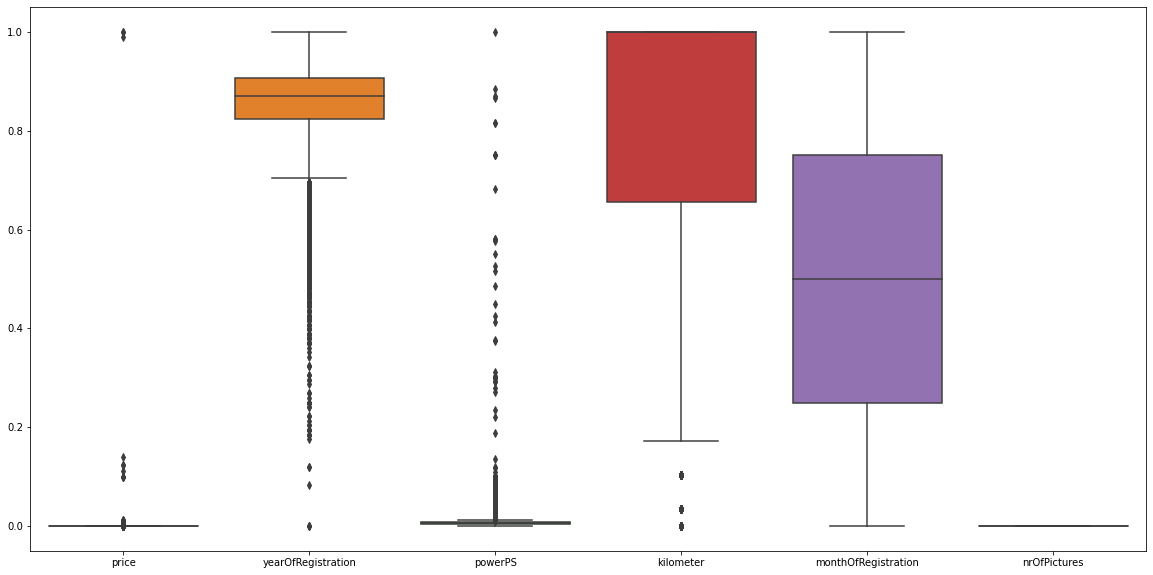

In [15]:
plt.figure(figsize=figsize)
sns.boxplot(data=data[numerical_columns])
plt.show()

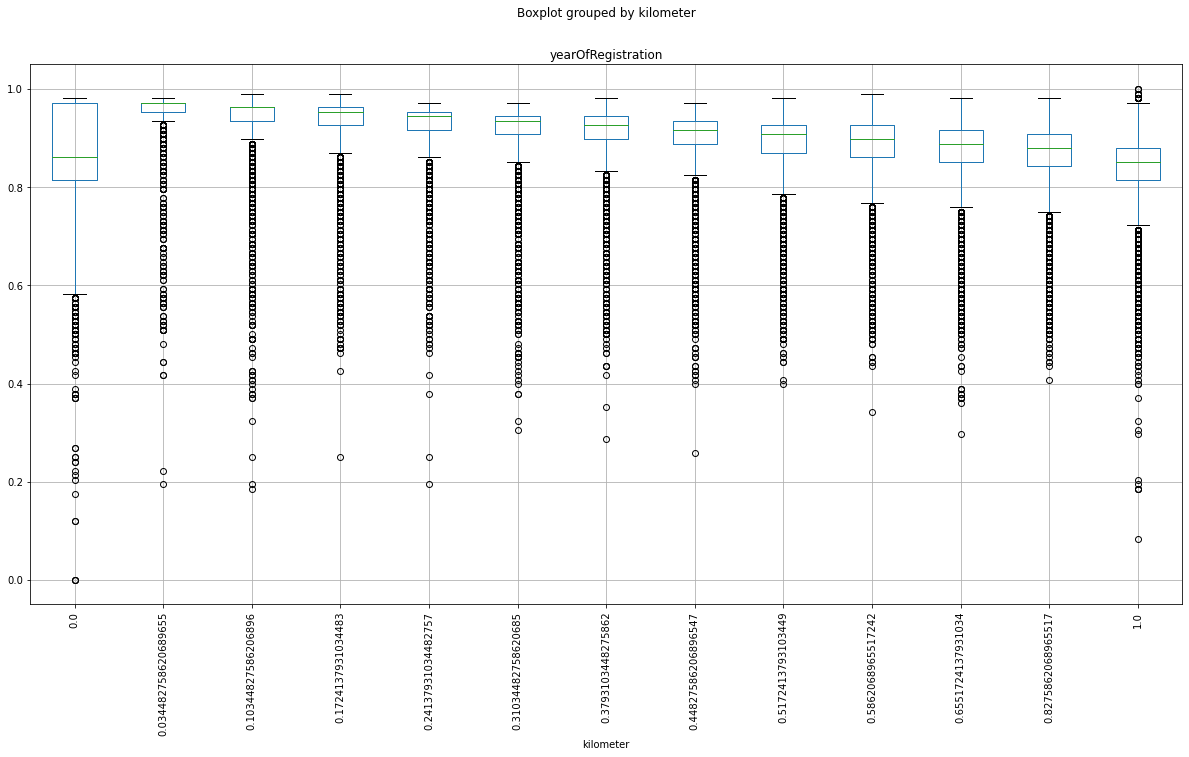

In [16]:
data.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

### 4 Выполните замену категориальных признаков

In [17]:
categorical_columns = [i for i in data.columns if data[i].dtype.name == 'object']
print("Categorical: " + str(categorical_columns))

Categorical: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [18]:
nonbinary = [column for column in categorical_columns if len(data[column].unique()) > 2]

for column in [column for column in categorical_columns if len(data[column].unique()) == 2]:
    for i, unic_item in enumerate(data[column].unique()):
        data[column] = data[column].replace(to_replace=[unic_item], value=[i])

data_nonbinary = pd.get_dummies(data[nonbinary])
data.drop(nonbinary, axis=1, inplace=True)
data = pd.concat([data_nonbinary, data] , axis=1)

### 5 Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

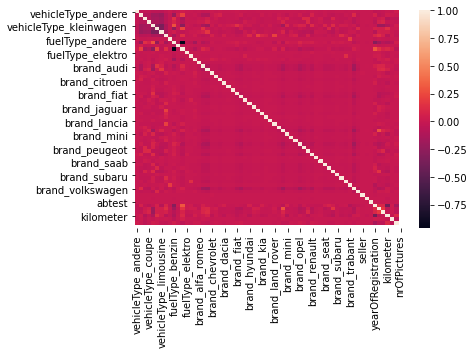

In [21]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

### 6 Заполните пропущенные значения в данных

In [22]:
data.isnull().sum()

vehicleType_andere        0
vehicleType_bus           0
vehicleType_cabrio        0
vehicleType_coupe         0
vehicleType_kleinwagen    0
                         ..
powerPS                   0
kilometer                 0
monthOfRegistration       0
notRepairedDamage         0
nrOfPictures              0
Length: 64, dtype: int64

Пропущенных данных нет

### 7.1 Решите поставленную задачу регрессии в соответствии с заданием.

In [23]:
data_x, data_y = data.drop(['price'], axis=1), data['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

138233   -0.000052
252136    0.000007
82359     0.000033
182888   -0.000013
268555   -0.000026
202441    0.000027
49804     0.000045
146772    0.000041
271698    0.000050
298224    0.000120
232237    0.000020
115707   -0.000026
273348    0.000125
195717   -0.000041
180612   -0.000058
Name: price, dtype: float64


In [24]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.11029683467010087 p_value: 2.2004368928002345e-210
Spearman correlation: 0.6476392771454945 p_value: 0.0


### 7.2

In [28]:
reg = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(train_x, train_y)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 2.95


In [29]:
reg = Ridge(alpha=best_alpha)
reg.fit(train_x,train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

138233   -0.000051
252136    0.000006
82359     0.000033
182888   -0.000012
268555   -0.000026
202441    0.000027
49804     0.000045
146772    0.000041
271698    0.000049
298224    0.000121
232237    0.000020
115707   -0.000026
273348    0.000129
195717   -0.000041
180612   -0.000060
Name: price, dtype: float64


In [30]:
# Корреляция
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.1101876084684505 p_value: 5.7195267301707e-210
Spearman correlation: 0.6454783420234547 p_value: 0.0
